In [ ]:
import os
import time
import numpy as np 
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision.utils import save_image
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import Dataset, DataLoader
import cv2

In [ ]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"arpitpipara","key":"fc1d1f4e3c94dae3a757f0293824578f"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d thedownhill/art-images-drawings-painting-sculpture-engraving

 99% 576M/583M [00:13<00:00, 77.1MB/s]
100% 583M/583M [00:14<00:00, 42.8MB/s]


In [ ]:
!ls

 art-images-drawings-painting-sculpture-engraving.zip   kaggle.json
'kaggle (1).json'				        sample_data


In [ ]:
!unzip -q art-images-drawings-painting-sculpture-engraving.zip

In [ ]:
%cd /content

/content


In [ ]:
!ls

 art-images-drawings-painting-sculpture-engraving.zip   kaggle.json
 dataset					        musemart
'kaggle (1).json'				        sample_data


In [ ]:
TRAIN_PATH = 'dataset/dataset_updated/training_set/painting/'

train_ids = next(os.walk(TRAIN_PATH))[2]

In [ ]:
print([f for f in os.listdir(TRAIN_PATH)])

['1030.jpg', '0830.jpg', '1266.jpg', '1584.jpg', '1254.jpg', '0463.jpg', '1149.jpg', '1996 20.26.31.jpg', '1797.jpg', '1314.jpg', '2169.jpg', '1469.jpg', '0928.jpg', '1361.jpg', '1537.jpg', '0407.jpg', '0092.jpg', '2022.jpg', '2048.jpg', '0236.jpg', '0255.jpg', '1945.jpg', '0154.jpg', '2101.jpg', '1379.jpg', '0259.jpg', '1050.jpg', '1039.jpg', '0487.jpg', '0393.jpg', '2102.jpg', '1940.jpg', '1899.jpg', '0850.jpg', '2110.jpg', '2020.jpg', '0325.jpg', '1296.jpg', '0151.jpg', '1604.jpg', '1825.jpg', '0714.jpg', '1619.jpg', '0048.jpg', '2051.jpg', '1529.jpg', '1701.jpg', '2181.jpg', '1179.jpg', '0222.jpg', '1384.jpg', '1918.jpg', '0210.jpg', '0319.jpg', '0256.jpg', '0818.jpg', '0416.jpg', '0299.jpg', '0459.jpg', '0848.jpg', '2133.jpg', '0947.jpg', '0043.jpg', '1205.jpg', '0051.jpg', '0667.jpg', '2057.jpg', '0465.jpg', '1816.jpg', '1440.jpg', '0646.jpg', '1006.jpg', '0493.jpg', '0220.jpg', '1615.jpg', '1957.jpg', '0723.jpg', '1017.jpg', '1612.jpg', '0701.jpg', '1364.jpg', '1411.jpg', '2324.

In [ ]:
root_dir = TRAIN_PATH
files = [f for f in os.listdir(root_dir)]
l = []
for i in range(len(files)):
  rgb = cv2.imread(os.path.join(root_dir,files[i]))
  if rgb is None:
    l.append(files[i])


In [ ]:
print((l))

['1050.jpg', '0850.jpg', '0325.jpg', '1825.jpg', '2000.jpg', '1000.jpg', '0475.jpg', '2025.jpg', '1725.jpg', '1025.jpg', '0400.jpg', '1475.jpg', '2125.jpg', '1075.jpg', '1350.jpg', '0625.jpg', '0525.jpg', '0175.jpg', '1575.jpg', '1325.jpg', '1375.jpg', '0375.jpg', '0025.jpg', '0900.jpg', '0275.jpg', '1975.jpg', '2175.jpg', '1400.jpg', '2150.jpg', '1625.jpg', '0575.jpg', '2350.jpg', '0775.jpg', '0150.jpg', '2325.jpg', '0950.jpg', '0875.jpg', '0350.jpg', '0825.jpg', '0225.jpg', '0725.jpg', '1650.jpg', '0975.jpg', '0650.jpg', '1750.jpg', '2050 20.26.31.jpg', '1100.jpg', '1125.jpg', '1925.jpg', '1200.jpg', '1900.jpg', '1675.jpg', '0050.jpg', '1800.jpg', '1275.jpg', '0125.jpg', '1775.jpg', '0075.jpg', '0600.jpg', '0450.jpg', '0200.jpg', '2250.jpg', '0500.jpg', '1175.jpg', '2300.jpg', '1500.jpg', '0925.jpg', '0550.jpg', '0425.jpg', '1525.jpg', '1425.jpg', '0000.jpg', '1950.jpg', '2100.jpg', '1225.jpg', '1300.jpg', '0250.jpg', '1850.jpg', '0800.jpg', '1875.jpg', '0750.jpg', '0700.jpg', '1700.

In [ ]:
%cd dataset/dataset_updated/training_set/painting

/content/dataset/dataset_updated/training_set/painting


In [ ]:
!rm '2000.jpg' '2050 20.26.31.jpg' '1875.jpg' '1450.jpg' '0450.jpg' '0000.jpg' '0175.jpg' '1100.jpg' '1200.jpg' '0575.jpg' '1575.jpg' '1025.jpg' '1175.jpg' '1225.jpg' '1475.jpg' '1675.jpg' '0325.jpg' '1275.jpg' '0675.jpg' '1950.jpg' '2100.jpg' '1625.jpg' '2125.jpg' '2300.jpg' '1775.jpg' '1075.jpg' '0700.jpg' '0750.jpg' '1350.jpg' '0525.jpg' '2350.jpg' '1525.jpg' '1725.jpg' '0150.jpg' '2250.jpg' '2150.jpg' '0550.jpg' '0425.jpg' '1300.jpg' '1850.jpg' '0350.jpg' '0500.jpg' '1650.jpg' '0475.jpg' '0800.jpg' '1750.jpg' '0125.jpg' '1000.jpg' '1125.jpg' '1325.jpg' '0600.jpg' '2175.jpg' '0250.jpg' '2025.jpg' '1900.jpg' '2075.jpg' '1425.jpg' '0050.jpg' '0775.jpg' '1975.jpg' '0825.jpg' '0225.jpg' '0850.jpg' '0200.jpg' '1825.jpg' '1800.jpg' '0375.jpg' '1400.jpg' '1050.jpg' '0275.jpg' '0025.jpg' '0725.jpg' '2325.jpg' '1500.jpg' '1700.jpg' '0950.jpg' '0650.jpg' '0625.jpg' '1925.jpg' '0875.jpg' '0975.jpg' '0900.jpg' '0075.jpg' '0400.jpg' '1375.jpg' '0925.jpg'

In [ ]:
!ls

 0001.jpg	      0784.jpg		   1572.jpg
 0002.jpg	      0785.jpg		   1573.jpg
 0003.jpg	      0786.jpg		   1574.jpg
 0004.jpg	      0787.jpg		   1576.jpg
 0005.jpg	      0788.jpg		   1577.jpg
 0007.jpg	      0790.jpg		   1578.jpg
 0008.jpg	      0791.jpg		   1579.jpg
 0010.jpg	      0792.jpg		   1580.jpg
 0011.jpg	      0794.jpg		   1581.jpg
 0013.jpg	      0795.jpg		   1582.jpg
 0014.jpg	      0796.jpg		   1583.jpg
 0015.jpg	      0797.jpg		   1584.jpg
 0016.jpg	      0798.jpg		   1585.jpg
 0018.jpg	      0799.jpg		   1586.jpg
 0019.jpg	      0801.jpg		   1587.jpg
 0020.jpg	      0802.jpg		   1588.jpg
 0021.jpg	      0803.jpg		   1589.jpg
 0022.jpg	      0804.jpg		   1590.jpg
 0023.jpg	      0805.jpg		   1591.jpg
 0024.jpg	      0806.jpg		   1592.jpg
 0026.jpg	      0807.jpg		   1593.jpg
 0027.jpg	      0809.jpg		   1594.jpg
 0028.jpg	      0810.jpg		   1595.jpg
 0029.jpg	      0812.jpg		   1596.jpg
 0030.jpg	      0815.jpg		   1597.jpg
 0031.jpg	      0816.jpg		   1599.jpg
 0032.jpg	  

In [ ]:
class Configuration:
    model_file_name = 'checkpoint'
    load_model_to_train = True
    load_model_to_test = True
    device = "cuda" if torch.cuda.is_available() else "cpu"
   
config = Configuration()
print('Device:',config.device)

Device: cuda


In [ ]:
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
from skimage.io import imread

print("Opencv")
img = cv2.imread(os.path.join('dataset/dataset_updated/training_set/painting/0001.jpg'))
img = img.astype(np.float32) 
img /= 255.0 
limg = cv2.cvtColor(img,cv2.COLOR_BGR2Lab) 
print(limg[:,:,0])
print("skimage")
img = imread(os.path.join('dataset/dataset_updated/training_set/painting/0001.jpg'))
img = img.astype('float32') / 255
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
lab = rgb2lab(img)
print(lab[:,:,0])


Opencv


AttributeError: ignored

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, process_type):
        self.root_dir = root_dir
        self.files = [f for f in os.listdir(root_dir)]
        self.process_type = process_type
        print('Total Files:', len(self.files), '| Process:',self.process_type,)

    def __len__(self):
        return (len(self.files))

    def __getitem__(self, index):
             #*** Read the image from file ***
            #print(index)
              
            self.rgb_img = cv2.imread(os.path.join(self.root_dir,self.files[index]))
            
            if self.rgb_img is None:
                print(self.files[index])
                raise Exception

            self.rgb_img = self.rgb_img.astype(np.float32) 
            self.rgb_img /= 255.0 
            
            #*** Resize the color image to pass to vgg encoder ***
            rgb_vgg_img = cv2.resize(self.rgb_img, (224, 224))
            og_img = cv2.cvtColor(rgb_vgg_img,cv2.COLOR_BGR2RGB)
            
            #*** Resize the color image to pass to inception encoder ***
            rgb_inception_img = cv2.resize(self.rgb_img, (300, 300))
            
            ''' Encoder Images '''
            #*** Convert the encoder color image to normalized lab space ***
            self.lab_encoder_img = cv2.cvtColor(rgb_vgg_img,cv2.COLOR_BGR2Lab) 
            
            #*** Splitting the lab images into l-channel, a-channel, b-channel ***
            l_encoder_img, a_encoder_img, b_encoder_img = self.lab_encoder_img[:,:,0],self.lab_encoder_img[:,:,1],self.lab_encoder_img[:,:,2]
            
            #*** Normalizing l-channel between [-1,1] ***
            #l_encoder_img = l_encoder_img/50.0 - 1.0
            
            #*** Repeat the l-channel to 3 dimensions ***
            l_encoder_img = torchvision.transforms.ToTensor()(l_encoder_img)
            l_encoder_img = l_encoder_img.expand(3,-1,-1)
            
            #*** Normalize a and b channels and concatenate ***
            a_encoder_img = (a_encoder_img/128.0)
            b_encoder_img = (b_encoder_img/128.0)
            a_encoder_img = torch.stack([torch.Tensor(a_encoder_img)])
            b_encoder_img = torch.stack([torch.Tensor(b_encoder_img)])
            ab_encoder_img = torch.cat([a_encoder_img, b_encoder_img], dim=0)
            
            ''' Inception Images '''
            #*** Convert the inception color image to lab space ***
            self.lab_inception_img = cv2.cvtColor(rgb_inception_img,cv2.COLOR_BGR2Lab)
            
            #*** Extract the l-channel of inception lab image *** 
            l_inception_img = self.lab_inception_img[:,:,0]
             
            #*** Convert the inception l-image to torch Tensor and stack it in 3 channels ***
            l_inception_img = torchvision.transforms.ToTensor()(l_inception_img)
            l_inception_img = l_inception_img.expand(3,-1,-1)
            
            ''' return images to data-loader '''
            rgb_vgg_img = torchvision.transforms.ToTensor()(rgb_vgg_img)
            return l_encoder_img, ab_encoder_img, l_inception_img, rgb_vgg_img, self.files[index],og_img
        
'''
    def show_rgb(self, index):
        self.__getitem__(index)
        print("RGB image size:", self.rgb_img.shape)        
        cv2.imshow('RGB image',self.rgb_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_encoder(self, index):
        self.__getitem__(index)
        print("Encoder Lab image size:", self.lab_encoder_img.shape)
        cv2.imshow('Encoder Lab image',self.lab_encoder_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    def show_lab_inception(self, index):
        self.__getitem__(index)
        print("Inception Lab image size:", self.lab_inception_img.shape)
        cv2.imshow('Inception Lab image',self.lab_inception_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    def show_other_images(self, index):
        a,b,c,d,_ = self.__getitem__(index)
        print("Encoder l channel image size:",a.shape)
        cv2.imshow('Encoder l channel image',a.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Encoder ab channel image size:",b.shape)
        cv2.imshow('Encoder a channel image',b.detach().numpy().transpose(1,2,0)[:,:,0])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imshow('Encoder b channel image',b.detach().numpy().transpose(1,2,0)[:,:,1])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Inception l channel image size:",c.shape)
        cv2.imshow('Inception l channel image',c.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        print("Color resized image size:",d.shape)
        cv2.imshow('Color resized image',d.detach().numpy().transpose(1,2,0))
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        '''

'\n    def show_rgb(self, index):\n        self.__getitem__(index)\n        print("RGB image size:", self.rgb_img.shape)        \n        cv2.imshow(\'RGB image\',self.rgb_img)\n        cv2.waitKey(0)\n        cv2.destroyAllWindows()\n\n    def show_lab_encoder(self, index):\n        self.__getitem__(index)\n        print("Encoder Lab image size:", self.lab_encoder_img.shape)\n        cv2.imshow(\'Encoder Lab image\',self.lab_encoder_img)\n        cv2.waitKey(0)\n        cv2.destroyAllWindows()\n\n    def show_lab_inception(self, index):\n        self.__getitem__(index)\n        print("Inception Lab image size:", self.lab_inception_img.shape)\n        cv2.imshow(\'Inception Lab image\',self.lab_inception_img)\n        cv2.waitKey(0)\n        cv2.destroyAllWindows()\n    \n    def show_other_images(self, index):\n        a,b,c,d,_ = self.__getitem__(index)\n        print("Encoder l channel image size:",a.shape)\n        cv2.imshow(\'Encoder l channel image\',a.detach().numpy().transpose

In [ ]:
class FusionLayer(nn.Module):
    def __init__(self):
        super(FusionLayer,self).__init__()

    def forward(self, inputs, mask=None):
        vgg, emb = inputs
        emb = torch.stack([torch.stack([emb],dim=2)],dim=3)
        emb = emb.repeat(1,1,vgg.shape[2],vgg.shape[3])
        fusion = torch.cat((vgg,emb),1)
        return fusion

In [ ]:
class Decoder(nn.Module):
    def __init__(self, input_depth):
        super(Decoder,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=input_depth, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(256),

            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2.0),
            
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            #nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            #nn.ReLU(inplace=True),
            #nn.BatchNorm2d(64),
            nn.Upsample(scale_factor=2.0),
            
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.Upsample(scale_factor=2.0),
            
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(16),
            nn.Upsample(scale_factor=2.0),

            nn.Conv2d(in_channels=16, out_channels=2, kernel_size=3, stride=1, padding=1),
            nn.Tanh(),
            nn.Upsample(scale_factor=2.0),
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
class Colorization(nn.Module):
    def __init__(self, depth_after_fusion):
        super(Colorization,self).__init__()
        #self.encoder = Encoder()
        self.fusion = FusionLayer()
        self.after_fusion = nn.Conv2d(in_channels=1512, out_channels = depth_after_fusion,kernel_size=1, stride=1,padding=0)
        self.bnorm = nn.BatchNorm2d(depth_after_fusion)
        self.decoder = Decoder(depth_after_fusion)

    def forward(self, vgg_emb, inception_emb):
        #img_enc = self.encoder(img_l)
        fusion = self.fusion([vgg_emb, inception_emb])
        fusion = self.after_fusion(fusion)
        fusion = self.bnorm(fusion)
        return self.decoder(fusion)

def init_weights(m):
    if type(m) == nn.Conv2d or type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight.data)

In [ ]:
vgg_model = models.vgg16(pretrained=True).features.float().to(config.device)
vgg_model = vgg_model.float()
vgg_model.eval()

inception_model = models.inception_v3(pretrained=True).float().to(config.device)
inception_model = inception_model.float()
inception_model.eval()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [ ]:
epochs = 20
batch_size = 16
learning_rate = 0.001
learning_rate_decay = 0.5
#point_batches = 500

In [ ]:
'''
if config.load_model_to_train or config.load_model_to_test:
    checkpoint = torch.load(config.model_file_name,map_location=torch.device(config.device))
    model = checkpoint['model']
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(config.device) 
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    print('Loaded pretrain model | Previous train loss:',checkpoint['train_loss'], '| Previous validation loss:',checkpoint['val_loss'])
else:
  '''
model = Colorization(512).to(config.device) 
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate, weight_decay=1e-6)
loss_criterion = torch.nn.MSELoss(reduction='mean').to(config.device)
milestone_list  = list(range(0,epochs,5))
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestone_list, gamma=learning_rate_decay)
writer = SummaryWriter('runs/vgg_inception')

# Validation

In [ ]:
%cd /content

/content


In [ ]:
!mkdir validation_painting

In [ ]:
!ls

art-images-drawings-painting-sculpture-engraving.zip  musemart
dataset						      runs
drive						      sample_data
kaggle.json					      validation_painting


In [ ]:
!mv dataset/dataset_updated/training_set/painting/01*.jpg validation_painting/

In [ ]:
!mv dataset/dataset_updated/training_set/painting/02*.jpg validation_painting/

In [ ]:
!ls validation_painting/

 0101.jpg	      0142.jpg	 0181.jpg   0219.jpg		 0259.jpg
 0102.jpg	      0143.jpg	 0182.jpg   0220.jpg		 0260.jpg
 0103.jpg	      0144.jpg	 0183.jpg   0222.jpg		 0261.jpg
 0104.jpg	      0146.jpg	 0184.jpg   0223.jpg		 0262.jpg
 0105.jpg	      0147.jpg	 0185.jpg   0224.jpg		 0263.jpg
 0106.jpg	      0148.jpg	 0186.jpg   0226.jpg		 0264.jpg
 0107.jpg	      0149.jpg	 0187.jpg   0227.jpg		 0265.jpg
 0108.jpg	      0151.jpg	 0188.jpg   0228.jpg		 0266.jpg
 0109.jpg	      0152.jpg	 0189.jpg   0229.jpg		 0267.jpg
 0110.jpg	      0153.jpg	 0190.jpg   0230.jpg		 0268.jpg
 0111.jpg	      0154.jpg	 0191.jpg   0231.jpg		 0269.jpg
 0112.jpg	      0155.jpg	 0192.jpg   0232.jpg		 0270.jpg
 0114.jpg	      0156.jpg	 0193.jpg   0233.jpg		 0271.jpg
 0115.jpg	      0157.jpg	 0194.jpg   0234.jpg		 0272.jpg
 0116.jpg	      0158.jpg	 0195.jpg   0235.jpg		 0273.jpg
 0117.jpg	      0159.jpg	 0196.jpg   0236.jpg		 0274.jpg
 0118.jpg	      0160.jpg	 0197.jpg   0237.jpg		 0276.jpg
 0119.jpg	      0161.jpg	 0198.

In [ ]:
VAL_PATH = 'validation_painting/'

In [ ]:
print(len([f for f in os.listdir(VAL_PATH)]))

174


# Training

In [ ]:
train_dataset = CustomDataset(TRAIN_PATH,'train')
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers = 16)

validataion_dataset = CustomDataset(VAL_PATH,'validation')
validation_dataloader = torch.utils.data.DataLoader(validataion_dataset, batch_size = batch_size, shuffle=True, num_workers=16)

Total Files: 1868 | Process: train
Total Files: 174 | Process: validation


In [ ]:
for epoch in range(epochs):
  print('Starting epoch:',epoch+1)
  #*** Training step ***
  loop_start = time.time()
  avg_loss = 0.0
  batch_loss = 0.0
  main_start = time.time()
  model.train()

  for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(train_dataloader):
    #*** Skip bad data ***
    if not img_l_encoder.ndim:
      continue
    #*** Move data to GPU if available ***
    img_l_encoder = img_l_encoder.to(config.device)
    img_ab_encoder = img_ab_encoder.to(config.device)
    img_l_inception = img_l_inception.to(config.device)
    #*** Initialize Optimizer ***
    optimizer.zero_grad()
    #*** Forward Propagation ***
    inception_embs = inception_model(img_l_inception.float())
    #print(inception_embs.shape)
    vgg_embs = vgg_model(img_l_encoder.float())
    #print(vgg_embs.shape)
    output_ab = model(vgg_embs,inception_embs)
    #print(output_ab.shape)
    #*** Back propogation ***
    loss = loss_criterion(output_ab, img_ab_encoder.float())
    loss.backward()
    #*** Weight Update ****
    optimizer.step()
    #*** Reduce Learning Rate ***
    scheduler.step()
    #*** Loss Calculation ***
    avg_loss += loss.item()
    
    #*** Print stats after every point_batches ***
    '''
    if idx%point_batches==0: 
      loop_end = time.time()   
      print('Batch:',idx, '| Processing time for',point_batches,':',str(loop_end-loop_start)+'s',' | Batch Loss:', batch_loss/500)
      loop_start = time.time()
      batch_loss = 0.0
    '''
    
  #*** Print Training Data Stats ***
  train_loss = avg_loss/len(train_dataloader)* batch_size
  writer.add_scalar('Loss/train', train_loss, epoch)
  print('Training Loss:',train_loss,'| Processed in ',str(time.time()-main_start)+'s') 

  avg_loss = 0.0
  loop_start = time.time()
  #*** Intialize Model to Eval Mode for validation ***
  with torch.no_grad():
    model.eval()
    for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(validation_dataloader):
      #*** Skip bad data ***
      if not img_l_encoder.ndim:
        continue
      #*** Move data to GPU if available ***
      img_l_encoder = img_l_encoder.to(config.device)
      img_ab_encoder = img_ab_encoder.to(config.device)
      img_l_inception = img_l_inception.to(config.device)
      #*** Forward Propagation ***
      inception_embs = inception_model(img_l_inception.float())
      vgg_embs = vgg_model(img_l_encoder.float())
      output_ab = model(vgg_embs,inception_embs)
      #*** Loss Calculation ***
      loss = loss_criterion(output_ab, img_ab_encoder.float())
      avg_loss += loss.item()

  val_loss = avg_loss/len(validation_dataloader)*32
  writer.add_scalar('Loss/validation', val_loss, epoch)
  print('Validation Loss:', val_loss,'| Processed in ',str(time.time()-loop_start)+'s')
  

#*** Save the Model to disk ***
  checkpoint = {'model': model,'model_state_dict': model.state_dict(),\
                      'optimizer' : optimizer,'optimizer_state_dict' : optimizer.state_dict(), \
                      'train_loss':train_loss}
  torch.save(checkpoint, "/content/drive/My Drive/colorization/VGG_Inception_D1_"+'.'+str(epoch+1))
  print("Model saved at:",os.getcwd()+'/'+"/content/drive/My Drive/colorization/VGG_Inception_D1_"+'.'+str(epoch+1))

Starting epoch: 1
Training Loss: 0.18803881076920745 | Processed in  58.357383728027344s
Validation Loss: 0.32328412207690155 | Processed in  5.0830724239349365s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.1
Starting epoch: 2


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Colorization. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FusionLayer. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Training Loss: 0.14668261788339695 | Processed in  58.152143478393555s
Validation Loss: 0.2528225793079896 | Processed in  5.005947828292847s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.2
Starting epoch: 3
Training Loss: 0.11906074777118161 | Processed in  58.29406690597534s
Validation Loss: 0.19801122762940146 | Processed in  5.030200719833374s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.3
Starting epoch: 4
Training Loss: 0.09997210562483877 | Processed in  58.123738050460815s
Validation Loss: 0.15549326755783774 | Processed in  4.982768535614014s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.4
Starting epoch: 5
Training Loss: 0.08608701143764023 | Processed in  58.05158305168152s
Validation Loss: 0.1335841789841652 | Processed in  5.000436544418335s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.5
Starting epoch: 6
Training Loss: 0.078123493072314

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Colorization. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FusionLayer. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Training Loss: 0.14668261788339695 | Processed in  58.152143478393555s
Validation Loss: 0.2528225793079896 | Processed in  5.005947828292847s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.2
Starting epoch: 3
Training Loss: 0.11906074777118161 | Processed in  58.29406690597534s
Validation Loss: 0.19801122762940146 | Processed in  5.030200719833374s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.3
Starting epoch: 4
Training Loss: 0.09997210562483877 | Processed in  58.123738050460815s
Validation Loss: 0.15549326755783774 | Processed in  4.982768535614014s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.4
Starting epoch: 5
Training Loss: 0.08608701143764023 | Processed in  58.05158305168152s
Validation Loss: 0.1335841789841652 | Processed in  5.000436544418335s
Model saved at: /content//content/drive/My Drive/colorization/VGG_Inception_D1_.5
Starting epoch: 6
Training Loss: 0.078123493072314

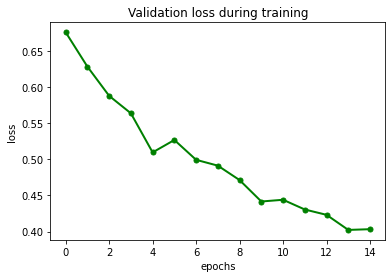

In [ ]:
import matplotlib.pyplot as plt

#val_loss = [0.6763,0.6286,0.5881,0.5639,0.5097,0.5269,0.4994,0.4913,0.4713,0.4416,0.4440,0.4305,0.4231,0.4022,0.4032]
plt.plot(val_loss ,'go-', linewidth=2, markersize=5)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Validation loss during training")
plt.show()

In [ ]:
checkpoint = {'model': model,'model_state_dict': model.state_dict(),\
                      'optimizer' : optimizer,'optimizer_state_dict' : optimizer.state_dict(), \
                      'train_loss':train_loss}
torch.save(checkpoint, "/content/drive/My Drive/AIP/Inception_color_"+'.'+str(epoch+1))
print("Model saved at:",os.getcwd()+'/'+"/content/drive/My Drive/AIP/Inception_color_"+'.'+str(epoch+1))

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Colorization. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FusionLayer. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Model saved at: /content//content/drive/My Drive/AIP/Inception_color_.1


In [ ]:
checkpoint = torch.load('/content/drive/My Drive/colorization/VGG_Inception_D1_.20',map_location=torch.device(config.device))
model = checkpoint['model']
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(config.device) 
optimizer = checkpoint['optimizer']
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print('Loaded pretrain model | Previous train loss:',checkpoint['train_loss'])

Loaded pretrain model | Previous train loss: 0.047749137681009426


In [ ]:
!ls dataset/dataset_updated/validation_set/painting/

0006.jpg  0313.jpg  0623.jpg  0968.jpg	1236.jpg  1560.jpg  1852.jpg  2157.jpg
0009.jpg  0332.jpg  0632.jpg  0977.jpg	1250.jpg  1598.jpg  1856.jpg  2200.jpg
0012.jpg  0340.jpg  0635.jpg  0985.jpg	1260.jpg  1600.jpg  1859.jpg  2203.jpg
0017.jpg  0348.jpg  0659.jpg  0999.jpg	1264.jpg  1607.jpg  1869.jpg  2217.jpg
0039.jpg  0352.jpg  0712.jpg  1009.jpg	1276.jpg  1620.jpg  1877.jpg  2222.jpg
0041.jpg  0358.jpg  0732.jpg  1016.jpg	1282.jpg  1637.jpg  1879.jpg  2225.jpg
0080.jpg  0367.jpg  0738.jpg  1023.jpg	1292.jpg  1641.jpg  1886.jpg  2233.jpg
0088.jpg  0372.jpg  0749.jpg  1027.jpg	1305.jpg  1647.jpg  1898.jpg  2235.jpg
0098.jpg  0373.jpg  0765.jpg  1037.jpg	1319.jpg  1662.jpg  1909.jpg  2245.jpg
0113.jpg  0380.jpg  0769.jpg  1055.jpg	1322.jpg  1664.jpg  1923.jpg  2261.jpg
0123.jpg  0385.jpg  0782.jpg  1056.jpg	1327.jpg  1676.jpg  1926.jpg  2263.jpg
0124.jpg  0422.jpg  0783.jpg  1064.jpg	1335.jpg  1677.jpg  1937.jpg  2264.jpg
0136.jpg  0435.jpg  0789.jpg  1067.jpg	1351.jpg  1682.jpg  1939.

In [ ]:
%cd /content

/content


In [ ]:
root_dir = 'dataset/dataset_updated/validation_set/painting'
files = [f for f in os.listdir(root_dir)]
l = []
for i in range(len(files)):
  rgb = cv2.imread(os.path.join(root_dir,files[i]))
  if rgb is None:
    l.append(files[i])
print(l)

[]


In [ ]:
%cd dataset/dataset_updated/validation_set/painting

/content/dataset/dataset_updated/validation_set/painting


In [ ]:
!rm '1600.jpg' '1150.jpg' '2200.jpg' '2275.jpg' '1250.jpg' '1550.jpg' '2225.jpg' '0300.jpg'

In [ ]:
test_dataset = CustomDataset('dataset/dataset_updated/validation_set/painting','test')
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=16)
print('Test: ',len(test_dataloader), '| Total Image:',len(test_dataloader))

Total Files: 228 | Process: test
Test:  228 | Total Image: 228


In [ ]:
def concatente_and_colorize(im_lab, img_ab):
    # Assumption is that im_lab is of size [1,3,224,224]
    #print(im_lab.size(),img_ab.size())
    np_img = im_lab[0].cpu().detach().numpy().transpose(1,2,0)
    lab = np.empty([*np_img.shape[0:2], 3],dtype=np.float32)
    lab[:, :, 0] = np.squeeze(((np_img) ))
    lab[:, :, 1:] = img_ab[0].cpu().detach().numpy().transpose(1,2,0) * 127
    np_img = cv2.cvtColor(lab,cv2.COLOR_Lab2BGR) 
    color_im = torch.stack([torchvision.transforms.ToTensor()(np_img)],dim=0)
    return color_im

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.io import imsave
from skimage import img_as_ubyte
avg_loss = 0.0
loop_start = time.time()
batch_start = time.time()
batch_loss = 0.0
pred_imgs = []
orig_imgs=[]
n = 0
for idx,(img_l_encoder, img_ab_encoder, img_l_inception, img_rgb, file_name,og_img) in enumerate(test_dataloader):
        #*** Skip bad data ***
        if not img_l_encoder.ndim:
            continue
        
        og_img=og_img.squeeze(0)
        orig_imgs.append(og_img)
            
        #*** Move data to GPU if available ***
        img_l_encoder = img_l_encoder.to(config.device)
        img_ab_encoder = img_ab_encoder.to(config.device)
        img_l_inception = img_l_inception.to(config.device)
        #*** Intialize Model to Eval Mode ***
        model.eval()
        
        #*** Forward Propagation ***
        inception_embs = inception_model(img_l_inception.float())
       #print(inception_embs.shape)
        vgg_embs = vgg_model(img_l_encoder.float())
        #print(vgg_embs.shape)
        output_ab = model(vgg_embs,inception_embs)
        
        np_out = output_ab[0].cpu().detach().numpy().transpose(1,2,0)
        print(np_out.shape)
        #*** Adding l channel to ab channels ***
        color_img = concatente_and_colorize(torch.stack([img_l_encoder[:,0,:,:]],dim=1),output_ab)
        color_img_jpg = color_img[0].detach().numpy().transpose(1,2,0)
        pred_imgs.append(color_img_jpg)
        #imsave('/content/drive/My Drive/AIP/Results_Inception_D1/results/result_'+str(n)+".jpg", img_as_ubyte(color_img_jpg))
        n = n+1
        #pred_imgs.append(color_img_jpg)
        #cv2_imshow(color_img_jpg)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        cv2.imwrite('/content/drive/My Drive/colorization/output_paintings_vgg_inception/'+file_name[0],color_img_jpg*255)
        # save_image(color_img[0],'outputs/'+file_name[0])

        #*** Printing to Tensor Board ***
        #grid = torchvision.utils.make_grid(color_img)
        #writer.add_image('Output Lab Images', grid, 0)
        
        #*** Loss Calculation ***
        loss = loss_criterion(output_ab, img_ab_encoder.float())
        avg_loss += loss.item()
        

        
        
test_loss = avg_loss/len(test_dataloader)
print('Test Loss:',avg_loss/len(test_dataloader),'| Processed in ',str(time.time()-loop_start)+'s')


(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 224, 2)
(224, 

In [ ]:
print(color_img_jpg)

[[[0.         0.04544039 0.04139624]
  [0.         0.02412139 0.01983501]
  [0.00754841 0.         0.09146188]
  ...
  [0.         0.05864682 0.10841004]
  [0.0064552  0.04224938 0.13388646]
  [0.06492729 0.10276113 0.18575168]]

 [[0.         0.04519755 0.04114418]
  [0.         0.02605049 0.02175616]
  [0.01295728 0.00055194 0.09434433]
  ...
  [0.         0.06278873 0.11128215]
  [0.         0.01680688 0.12038455]
  [0.         0.03071292 0.12765323]]

 [[0.06171141 0.01443137 0.05003496]
  [0.04880456 0.         0.03485795]
  [0.08199538 0.         0.08392349]
  ...
  [0.02288081 0.05928984 0.05663345]
  [0.         0.06010869 0.1859417 ]
  [0.         0.06507395 0.18974744]]

 ...

 [[0.09531519 0.01567904 0.00780871]
  [0.0861062  0.         0.        ]
  [0.         0.07895967 0.16803643]
  ...
  [0.00899526 0.03795698 0.07340219]
  [0.05861066 0.0265251  0.14864174]
  [0.06225251 0.03381112 0.15259965]]

 [[0.01906133 0.01953807 0.10435016]
  [0.00443789 0.00478715 0.09691   ]


In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio  as PSNR
from skimage.metrics import structural_similarity as SSIM
pred_imgs = np.asarray(pred_imgs)
# PSNR
psnr = 0
ssim = [] 
ssim_val =0
for i in range(len(pred_imgs)):
  psnr += PSNR(orig_imgs[i].numpy(),pred_imgs[i])
  temp = SSIM(orig_imgs[i].numpy(),pred_imgs[i],multichannel=True)
  ssim_val += temp
  ssim.append(temp)

psnr_avg = psnr/len(pred_imgs)
ssim_avg = ssim_val/len(pred_imgs)
print(psnr_avg)
print(ssim_avg)

In [ ]:
!ls

art-images-drawings-painting-sculpture-engraving.zip  musemart
dataset						      sample_data
drive						      validation_painting
kaggle.json


In [ ]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from PIL import Image
test_imgs = []
folder = "dataset/dataset_updated/validation_set/painting"
for filename in os.listdir(folder):
      img = imread(os.path.join(folder,filename))
      img = resize(img, (224, 224), mode='constant', preserve_range=True)
      img = img.astype('float32') / 255
      grey = rgb2gray(img)
      grey_3_channel = gray2rgb(grey)
      test_imgs.append(grey_3_channel)



In [ ]:
color_imgs = []
folder = "/content/drive/My Drive/AIP/Results_Inception_D1/results/"
for filename in os.listdir(folder):
      img = imread(os.path.join(folder,filename))
      color_imgs.append(img)

In [ ]:
print(len(color_imgs))

228


In [ ]:
color_imgs = np.array(pred_imgs)
test_imgs = np.array(test_imgs)
for i in range(len(color_imgs)):
    print(i)
    numpy_horizontal_concat = np.hstack((color_imgs[i],test_imgs[i]))
    numpy_horizontal_concat = Image.fromarray((numpy_horizontal_concat*255).astype(np.uint8))
    numpy_horizontal_concat.save('/content/drive/My Drive/AIP/Results_Inception_D1/concate_results/'+str(i)+".jpg")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227


In [ ]:
import numpy as np
pred_imgs = np.asarray(pred_imgs)

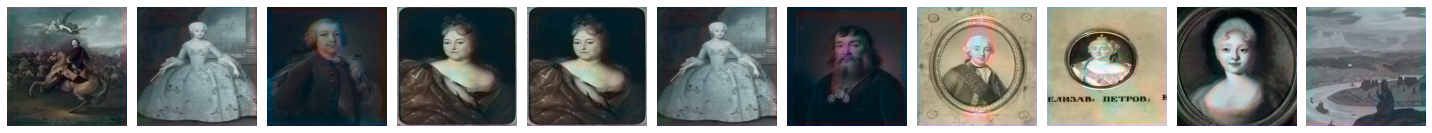

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(11):
    # grayscale
    plt.subplot(1, 11, i + 1)
    plt.imshow(pred_imgs[i])
    plt.gray()
    plt.axis('off')
 
''' 
   # recolorization
    plt.subplot(3, 16, i + 1 +16)
    plt.imshow(decoded_imgs[i].reshape(256, 256,3))
    plt.axis('off')
    
    # original
    plt.subplot(3, 16, i + 1 + 32)
    plt.imshow(X_test[i].reshape(256, 256,3))
    plt.axis('off')
'''
plt.tight_layout()
plt.show()